<a href="https://colab.research.google.com/github/Louisfhgr/Stoncks/blob/main/Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [7]:
!pip install yfinance
!apt install ace_tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package ace_tools


## Devisen

## Stockmarket

In [9]:
import yfinance as yf
import pandas as pd

# Liste von Tickers
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA"]

# Ergebnisliste
data = []

# Daten abrufen
for ticker in tickers:
    t = yf.Ticker(ticker)
    info = t.info
    hist = t.history(period="max")  # maximale Historie

    # Daten sammeln
    data.append({
        "Ticker": ticker,
        "Name": info.get("longName", ""),
        "Sektor": info.get("sector", ""),
        "Marktkapitalisierung": info.get("marketCap", None),
        "Dividendenrendite": info.get("dividendYield", None),
        "Daten verfügbar seit": hist.index.min().date(),
        "Anzahl Handelstage": len(hist)
    })

# DataFrame erstellen
df = pd.DataFrame(data)
df = df.set_index("Ticker")
df["Daten verfügbar seit"] = pd.to_datetime(df["Daten verfügbar seit"])

df


,Name,Sektor,Marktkapitalisierung,Dividendenrendite,Daten verfügbar seit,Anzahl Handelstage
Ticker,,,,,,
AAPL,Apple Inc.,Technology,3145105932288,0.49,1980-12-12,11248
MSFT,Microsoft Corporation,Technology,3816683732992,0.65,1986-03-13,9922
GOOGL,Alphabet Inc.,Communication Services,2376781004800,0.43,2004-08-19,5270
AMZN,"Amazon.com, Inc.",Consumer Cyclical,2444108496896,NaN,1997-05-15,7095
META,"Meta Platforms, Inc.",Communication Services,1766769426432,0.30,2012-05-18,3318
TSLA,"Tesla, Inc.",Consumer Cyclical,1038240120832,NaN,2010-06-29,3795


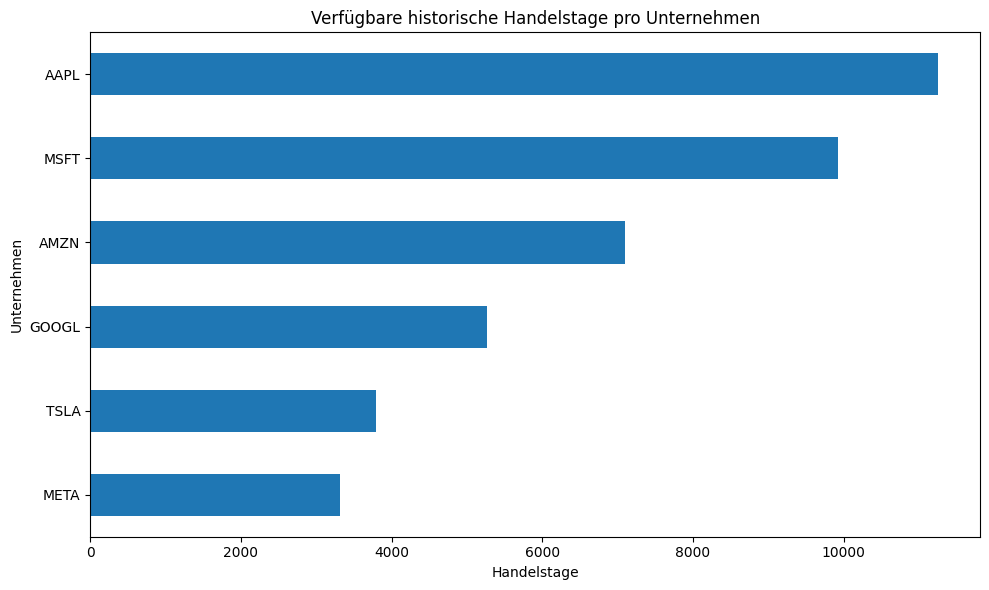

In [10]:
import matplotlib.pyplot as plt

df.sort_values("Anzahl Handelstage", ascending=True)["Anzahl Handelstage"].plot(
    kind="barh",
    figsize=(10, 6),
    title="Verfügbare historische Handelstage pro Unternehmen"
)

plt.xlabel("Handelstage")
plt.ylabel("Unternehmen")
plt.tight_layout()
plt.show()


## Nachrichten

## Zeitreihen